## Q2

In [2]:
import numpy as np
from sklearn import preprocessing, linear_model
import matplotlib.pyplot as plt

data = np.loadtxt('data/seeds_dataset.txt', delimiter='\t')
num_row, num_col = data.shape

np.random.seed(2018)
train = np.random.choice([True, False], num_row, replace=True, p=[0.5,0.5])
x_train = [data[train,:-1]]
y_train = data[train,-1].astype(int)
x_test = [data[~train,:-1]]
y_test = data[~train,-1].astype(int)

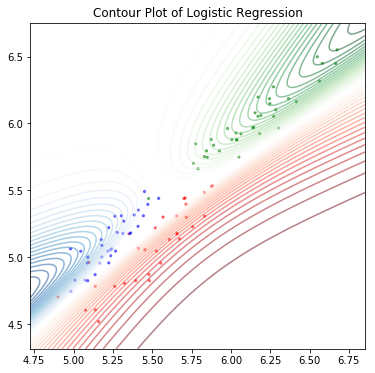

In [3]:
# Q2.1.a
x = x_train[0][:, [3, 6]].copy()
y = y_train.copy()

logit = linear_model.LogisticRegression(C = 10)
logit.fit(x, y)
# print(logit.coef_)
# print(logit.intercept_)
# print(y)

color = ['red', 'green', 'blue']
y_color = [color[i] for i in y-1] # 'red': class 1, 'green': class 2, 'blue': class 3

def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_proba = logit.predict_proba(mesh_data).reshape(steps, steps, 3)

contour_color = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1], c = y_color, alpha = 0.5, marker='o', s = 5)
plt.title("Contour Plot of Logistic Regression")
for i in range(3):
    plt.contour(xx0, xx1, np.maximum(mesh_proba[:,:,i], 0.5), 20, cmap=contour_color[i], alpha = 0.5)
plt.show()

In [4]:
# Q2.1.b
x_test2 = data[~train,:-1].copy()
row_num, col_num = x_test2.shape
print("The test dataset has %d rows and %d columns" % (row_num, col_num), "\n")

import pandas as pd
y_pred = logit.predict(x_test[0][:, [3, 6]])
confusion_df = pd.DataFrame(0, index = [1, 2, 3], columns = [1, 2, 3])

for i in range(len(y_test)):
    if y_test[i] == 1 and y_pred[i] == 1:
        confusion_df.loc[1][1] += 1
    elif y_test[i] == 1 and y_pred[i] == 2:
        confusion_df.loc[1][2] += 1
    elif y_test[i] == 1 and y_pred[i] == 3:
        confusion_df.loc[1][3] += 1
    elif y_test[i] == 2 and y_pred[i] == 1:
        confusion_df.loc[2][1] += 1
    elif y_test[i] == 2 and y_pred[i] == 2:
        confusion_df.loc[2][2] += 1
    elif y_test[i] == 2 and y_pred[i] == 3:
        confusion_df.loc[2][3] += 1
    elif y_test[i] == 3 and y_pred[i] == 1:
        confusion_df.loc[3][1] += 1
    elif y_test[i] == 3 and y_pred[i] == 2:
        confusion_df.loc[3][2] += 1
    else:
        confusion_df.loc[3][3] += 1

#confusion_df.columns = ['Predicted Class = 1', 'Predicted Class = 2', 'Predicted Class = 3']
#confusion_df.index = ['Actual Class = 1', 'Actual Class = 2', 'Actual Class = 3']
#print("Confusion matrix of logistic regression: ")
#confusion_df

from prettytable import PrettyTable

x = PrettyTable([" ", "Predicted Class = 1", "Predicted Class = 2", "Predicted Class = 3"]) 
x.padding_width = 1 
x.add_row(["Actual Class = 1", confusion_df[1][1], confusion_df[1][2], confusion_df[1][3]])
x.add_row(["Actual Class = 2", confusion_df[2][1], confusion_df[2][2], confusion_df[2][3]])
x.add_row(["Actual Class = 3", confusion_df[3][1], confusion_df[3][2], confusion_df[3][3]])
print("Confusion matrix of logistic regression: ")
print(x, "\n")

print('Score on test data:', logit.score(x_test[0][:,[3,6]], y_test), "\n")

print("Guess the score function of logistic regression: ")
print("   ANSWER:", "\n", "  Since (35+32+35)/107 = %f" %((35+32+35)/107), "I whink the score is the accuracy of the model")

The test dataset has 107 rows and 7 columns 

Confusion matrix of logistic regression: 
+------------------+---------------------+---------------------+---------------------+
|                  | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 |
+------------------+---------------------+---------------------+---------------------+
| Actual Class = 1 |          35         |          0          |          1          |
| Actual Class = 2 |          2          |          32         |          0          |
| Actual Class = 3 |          1          |          1          |          35         |
+------------------+---------------------+---------------------+---------------------+ 

Score on test data: 0.953271028037 

Guess the score function of logistic regression: 
   ANSWER: 
   Since (35+32+35)/107 = 0.953271 I whink the score is the accuracy of the model


In [5]:
# Q2.2
import numpy as np
from sklearn import preprocessing, linear_model, metrics
import matplotlib.pyplot as plt

standard_scaler = preprocessing.StandardScaler()
minmax_scaler = preprocessing.MinMaxScaler()

x_train0 = x_train[0][:, [3, 6]].copy()
x_train1 = standard_scaler.fit_transform(x_train0)
x_train2 = minmax_scaler.fit_transform(x_train0)
x_train = [x_train0, x_train1, x_train2]

x_test0 = x_test[0][:, [3, 6]].copy()
x_test1 = standard_scaler.fit_transform(x_test0)
x_test2 = minmax_scaler.fit_transform(x_test0)
x_test = [x_test0, x_test1, x_test2]

titles = ["Original", "Standard Scaler", "Minmax Scaler"]
# build logistic regression here

num_C = 10
C = [1.0] * num_C
for i in range(num_C):
    C[i] = pow(10, i-3)

inv_log_likelihood_train = [[0.0 for j in range(num_C)] for i in range(3)]
inv_log_likelihood_test = [[0.0 for j in range(num_C)] for i in range(3)]

# print(inv_log_likelihood_train, "\n")
# print(inv_log_likelihood_test)

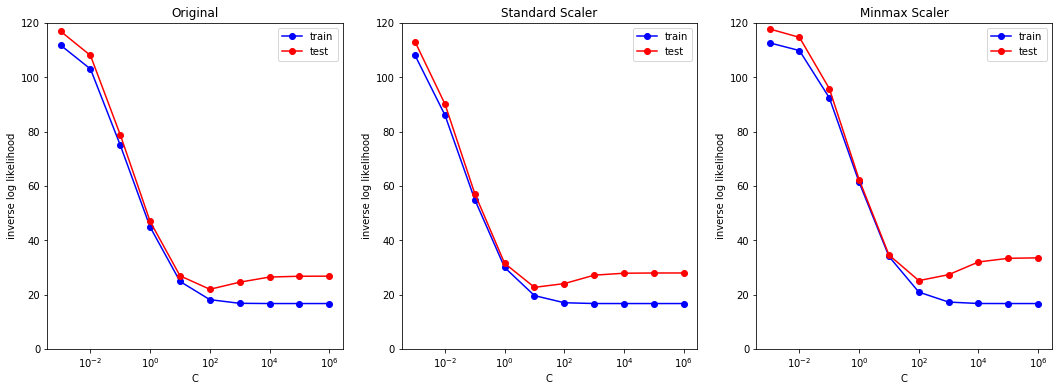

In [6]:
for element in enumerate(C):
    idx, c = element
    logit_regr = linear_model.LogisticRegression(C = c, multi_class = 'multinomial', solver = 'newton-cg')
    for i in range(3):
        logit_regr.fit(x_train[i], y_train)
        train_pred = logit_regr.predict_proba(x_train[i])
        train_error = metrics.log_loss(y_train, train_pred, normalize = False)
        test_pred = logit_regr.predict_proba(x_test[i])
        test_error = metrics.log_loss(y_test, test_pred, normalize = False)
        inv_log_likelihood_train[i][idx] = train_error
        inv_log_likelihood_test[i][idx] = test_error
        
plt.figure(figsize = (18, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xscale('log')
    plt.ylabel("inverse log likelihood")
    plt.xlabel("C")
    plt.ylim([0, 120])
    plt.plot(C, inv_log_likelihood_train[i], 'bo-', C, inv_log_likelihood_test[i], 'ro-')
    plt.legend(("train", "test"), loc='upper right')
    plt.title(titles[i])

plt.show()

EXPLAIN ABOVE GRAPHS: 

As C increases, the panalize strength of the model decreases, in other words, the complexity of the model increases, we pursue maximize the log likelihood, in our chart, is to minimize the inverse log likelihood, in other words, to minimize the erros.  

We pursue a model with high log likelihood and moderate complexity
As the complexity increases, the training errors decreases, but the test error will increase at some point, we need to do a tradeoff here, we aim at minimizing the test errors, as a result, we will choose the optimal C parameter where the test error starts to rebounce. 

Comparing the three graph, using original data and data after minmax scalling, the minimum test errors appear at C = 100, whilst, for the model built using data with standard scalling method, the minimum test error occurs at C = 10, which indicates a more complex model than using the other two scalling method.
In the Seeds Classification problem, I will choose to use standard scaler to convert the variables in the same scales first, as the plot shows, although the scaler doesn't change the optimal C parameter, it makes the error decreases dramatically as the C parameter changes